## Learning Outcomes
1. Gentle intro on CV
2. Recap on images as Numpy array
3. Image Cropping
4. Splitting and merging of color channels
5. Point operators
    - elementary operations: addition,subtraction,multiplication and division
    - gamma correction (nonlinear technique)
6. Image blending (add 2 images tgt)

## Setup

In [1]:
import sys
assert sys.version_info>=(3,7)

import cv2 as cv
import numpy as np
from util_func import show_img

## Recap on images as Numpy array
There are 2 primary types of images: *grayscale* and *color*
.
                                     **grayscale  |  **Color
                                     ---
                                     matrix (2D array)  |  3D array
                                     (h,w)  |  (h,w,channels)

In [2]:
# Create a grayscale image
img=np.zeros((2,4),dtype=np.uint8)
print(img)

[[0 0 0 0]
 [0 0 0 0]]


In [3]:
img_color = cv.cvtColor(img, cv.COLOR_GRAY2BGR)
print(img_color)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [4]:
img[0,1] = 50
img[1,2] = 150

print(img)

[[  0  50   0   0]
 [  0   0 150   0]]


In [5]:
img_color = cv.cvtColor(img,cv.COLOR_GRAY2BGR)
print(img_color)

[[[  0   0   0]
  [ 50  50  50]
  [  0   0   0]
  [  0   0   0]]

 [[  0   0   0]
  [  0   0   0]
  [150 150 150]
  [  0   0   0]]]


## Access element in array

In [6]:
img = cv.imread("images/lena.jfif")

a = img[49, 219,2]
b = img.item(49,219,2)
a == b

True

In [7]:
%timeit  a = img[49, 219,2]
%timeit b = img.item(49,219,2)

183 ns ± 1.89 ns per loop (mean ± std. dev. of 7 runs, 1,000,000 loops each)
187 ns ± 6 ns per loop (mean ± std. dev. of 7 runs, 10,000,000 loops each)


## Numpy slicing

In [8]:
h, w=img.shape[:2]
yc, xc = h // 2,w // 2

topleft = img[:yc, :xc]

show_img("topleft",topleft)

In [9]:
# 60 x 60 central region of the image
centre = img[yc-30:yc+30, xc-30:xc+30]

show_img("centre",centre)

## Create a white image

In [10]:
img = np.zeros((200,200)) + 255
img = np.uint8(img)

show_img("img",img)

## Exercise

In [11]:
## Extract region of interest
img=cv.imread("images/flower.jfif")

show_img("img", img)

## There are three ways to get the indices needed

In [12]:
# 1 way
img=cv.imread("images/flower.jfif")
img_copy = img.copy()


def rect_region(event,x,y,flags,params):
    if event == cv.EVENT_LBUTTONDOWN:
        print((x,y))
        cv.circle(img,(x,y),1,(0,0,255),-1)
        cv.imshow("img",img)
        
cv.imshow("img",img)
cv.setMouseCallback("img",rect_region)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
flower = img_copy[41:120, 89:173]

show_img("flower",flower)

In [14]:
## 2nd way
bbox = cv.selectROI("crop",img_copy)

flower = img_copy[int(bbox[1]): int(bbox[1]+bbox[3]),
                  int(bbox[0]): int(bbox[0] + bbox[2])]

show_img("flower",flower)

In [15]:
# 3rd way: paint app


In [16]:
img_arr = np.zeros((30, 30),dtype=np.uint8)

img_arr[:10, 10:20] = 255
img_arr[10:20, :10] = 255
img_arr[10:20, 20:] = 255
img_arr[20:, 10:20] = 255

img = np.tile(img_arr,(3,3))

show_img("pattern",img)

## Image cropping
Why?

- Remove unwanted object
- Seperate the image into a $3 \times 3$ grids. We move / adjust the camera in such a way that the object of interesr lies on the gridline or their intersections. As such, your image would look more aethetically appeling. This is know as rule of thirds.
- One of the image augmentation methods for Deep Learning model training.

In [17]:
img = cv.imread("images/dog.jfif")
img_copy = img.copy()

h, w = img.shape[:2]
# user defined parameters
n_vertical_grids = 4
n_horizontal_grids = 4

M = int(h / n_vertical_grids)
N = int(w / n_horizontal_grids)

tiles = []

for y in range (0, h, M):
    for x in range (0, w, N):
        x1 = x + N
        y1 = y+M
        
        if x1 > w and y1 > h:
            x1 = w - 1
            y1 = h - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h, x:w]
            tiles.append(tile)
            
        elif y1 > h:
            y1 = h - 1
            cv.rectangle(img_copy,(x,y),(x1,y1),(0,255,0),1)
            tile = img[y:h, x:x1]
            tiles.append(tile)
            
        elif x1 > w:
            x1 = w - 1
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:w]
            tiles.append(tile)
            
        else:
            cv.rectangle(img_copy, (x, y), (x1, y1), (0, 255, 0), 1)
            tile = img[y:y1, x:x1]
            tiles.append(tile)
            
show_img("crop",img_copy)

In [18]:
show_img("patch",tiles[9])

## Splitting and merging color channels

In [19]:
img = cv.imread("images/lena.jfif")

(b, g, r) = cv.split(img)
img_merge = cv.merge((b, g, r))
np.array_equal(img, img_merge)

True

In [20]:
import matplotlib.pyplot as plt

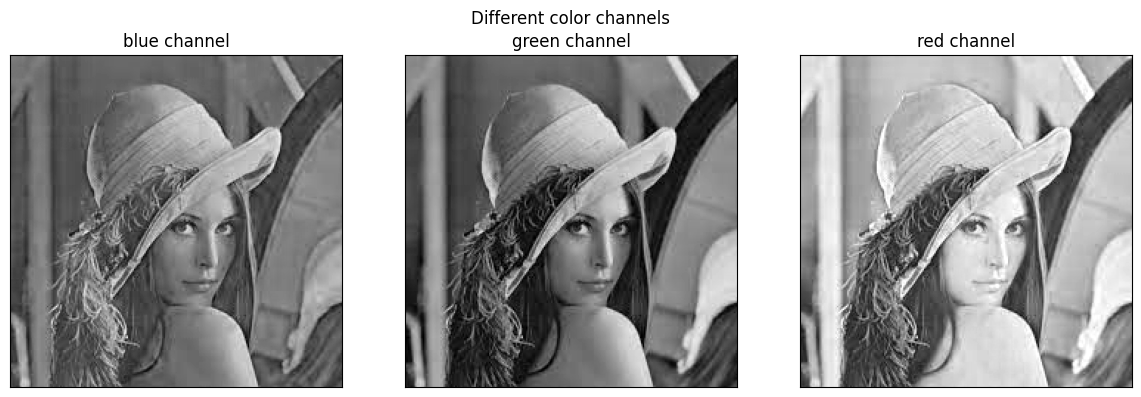

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12, 4), sharey=True)
fig.suptitle("Different color channels")

ax1.imshow(b, cmap=plt.cm.gray)
ax1.set(title="blue channel", xticks=[],yticks=[])
ax2.imshow(g, cmap=plt.cm.gray)
ax2.set(title="green channel", xticks=[],yticks=[])
ax3.imshow(r, cmap=plt.cm.gray)
ax3.set(title="red channel", xticks=[],yticks=[])

plt.tight_layout()
plt.show()

## Exercise (Display different channels in color images)
1. Display the blue, green and red channel of the lena image simultaneously. Comment on the images displayed.
2. Display the following images which originates from the file "images/dog.jfif".

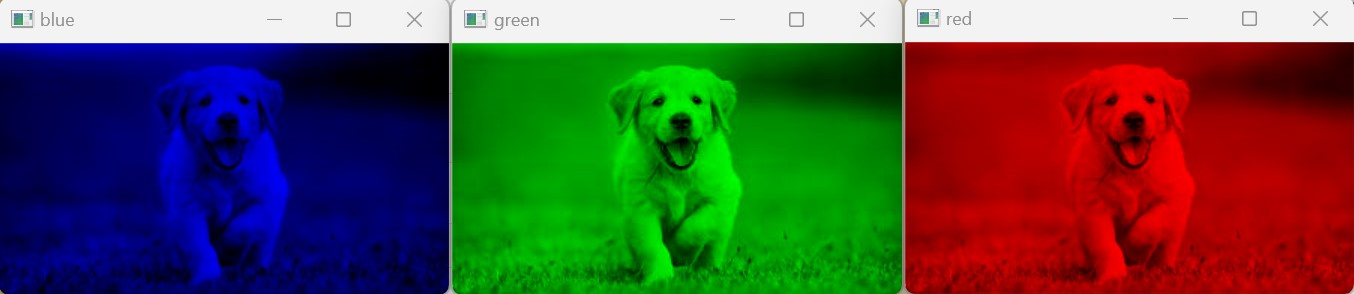

In [22]:
img = cv.imread("images/dog.jfif")

channels = cv.split(img)
# this color variable will be the window name
colors = ("blue", "green", "red")

imgs = []

for i, ch in enumerate(channels):
    img_arr = np.zeros_like(img)
    img_arr[..., i] = ch  #img_arr[:, :, i] = ch also can
    imgs.append(img_arr)
    
for c, img in zip(colors,imgs):
    cv.imshow(c, img)
    
cv.waitKey(0)
cv.destroyAllWindows()

## Point operators
Elementary maths operations: addition, subtraction, multiplication and division.

$$f_{trans}(\textbf{x}) = \alpha f(\textbf{x}) + \beta$$

- alpha = x or //
- beta = + or -

when alpha>1, contrast will increase.

when 0<alpha<1, contrast will decrease.

when beta>0, brightness will increase.

when beta<0, brightness will decrease.

In [23]:
np.uint8(np.array([-2, 0, 255, 300]))  #-2 is not a valid uint(0-255), at here will be 254

array([254,   0, 255,  44], dtype=uint8)

In [24]:
def point_op(img, alpha, beta):
    """point operators of image, Arguments:
    1. source image
    2. multiplier
    3. constant
    """
    img = img.astype(float)
    res = alpha * img + beta
    res = np.clip(res, 0, 255)
    return np.uint8(res)

In [25]:
img = cv.imread("images/bridge.jfif")

#increase the brightness and contrast
transform = point_op(img, 1.6, 20)

cv.imshow("original",img)
show_img("transform",transform)

In [26]:
darken = point_op(img, 1, -80)

show_img("img",darken)

## Gamma correction
Technique to adjust brightness of image.

$$O = (\frac{I}{255})^{\gamma} \times 255$$

gamma<1, make dark area brighter

gamma>1, make dark area darker.

In [27]:
gamma = 1 / 2.2

lookUpTable = np.empty((1,256),dtype = np.uint8)

for i in range(256):
    lookUpTable[0, i] = np.clip(pow(i / 255.0, gamma) * 255.0, 0, 255)
    
img = cv.imread("images/mountains_prop.jpg")
res = cv.LUT(img, lookUpTable)

cv.namedWindow("original",cv.WINDOW_NORMAL)
cv.imshow("original",img)
show_img("gamma correction",res,adjust=True)

## Image blending (add 2 images)
```
cv.addWeighted(img1, alpha, img2, 1-alpha, beta)
```
$$h(\textbf{x}) = \alpha f(\textbf{x}) + (1- \alpha)g(\textbf{x}) + \beta$$

In [28]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2,(w,h))
alpha = 0.7

res = cv.addWeighted(img,alpha, img2, 1-alpha, 0)

cv.imshow("lena",img)
cv.imshow("resized coin",img2)
show_img("image blending",res)

## Weekly activity 1
Create a random noise color and grayscale image. You can set your own width and height, but keep the total number of pixels of both images identical.

In [29]:
w = 400
h = 300

#noise color
random_noise_color = np.random.randint(0, 256, (h, w, 3), dtype=np.uint8)

#grayscale
random_noise_grayscale = np.random.randint(0, 256, (h, w), dtype=np.uint8)

cv.imshow("Random Noise (Color)", random_noise_color)
cv.imshow("Random Noise (Grayscale)", random_noise_grayscale)
cv.waitKey(0)
cv.destroyAllWindows()

## Weekly activity 2
Convert the code chunk found under section Divide an image into smaller patches using cropping into a function with the following signature:

crop_grid(img, num_horizontal_grid, num_vertical_grid, line_color)

    # img is the source image

    # num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.

    # line_color is the color of the grid line.

    # The output of the function should be image with grids


In [30]:
def crop_grid (img, num_horizontal_grid, num_vertical_grid, line_color):
    '''
    img is the source image.
    num_horizontal_grid and num_vertical_grid are the number of patches along x and y axes.
    line_color is the color of the grid line.
    The output of the function should be image with grids.
    '''
    img = cv.imread(img)
    img_copy = img.copy()

    h, w = img.shape[:2]
    
    num_vertical_patches = num_vertical_grid
    num_horizontal_patches = num_horizontal_grid

    M, N = int(h / num_vertical_patches), int(w / num_horizontal_patches)

    tiles = []

    for y in range (0, h, M):
        for x in range (0, w, N):
            x1 = x + N
            y1 = y + M
        
            if x1 > w and y1 > h:
                x1 = w - 1
                y1 = h - 1
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
                tile = img[y:h, x:w]
                tiles.append(tile)
            
            elif y1 > h:
                y1 = h - 1
                cv.rectangle(img_copy,(x,y),(x1,y1),line_color,1)
                tile = img[y:h, x:x1]
                tiles.append(tile)
            
            elif x1 > w:
                x1 = w - 1
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:w]
                tiles.append(tile)
            
            else:
                cv.rectangle(img_copy, (x, y), (x1, y1), line_color, 1)
                tile = img[y:y1, x:x1]
                tiles.append(tile)
            
    show_img("crop_grid",img_copy)



In [31]:
crop_grid("images/dog.jfif",10,10,(0,255,0))

## Weekly activity 3
Display image sequences of smooth transition of two images with different values of alpha. 
Refer to code in
section "Image blending". Use "lena.jfif" and "coins.jfif" as the base images.


In [32]:
img = cv.imread("images/lena.jfif")
img2 = cv.imread("images/coins.jfif")

# resize img2 to be the same dimension as img
h, w = img.shape[:2]
img2 = cv.resize(img2,(w,h))

for alpha in range(0,61):
    alpha /= 60
    res = cv.addWeighted(img, alpha, img2, 1 - alpha, 0)
    cv.imshow("Image Blending", res)
    cv.waitKey(1)

cv.waitKey(0)
cv.destroyAllWindows()

## Weekly Activity 4
Suppose you are a digital content creator and wish to share photo online. However, you wish to protect these images from being stolen or altered by others. Leverage your image processing knowledge to apply watermark on image "travel_hd.jpg". The example of resulting watermarked image are as shown in the following: 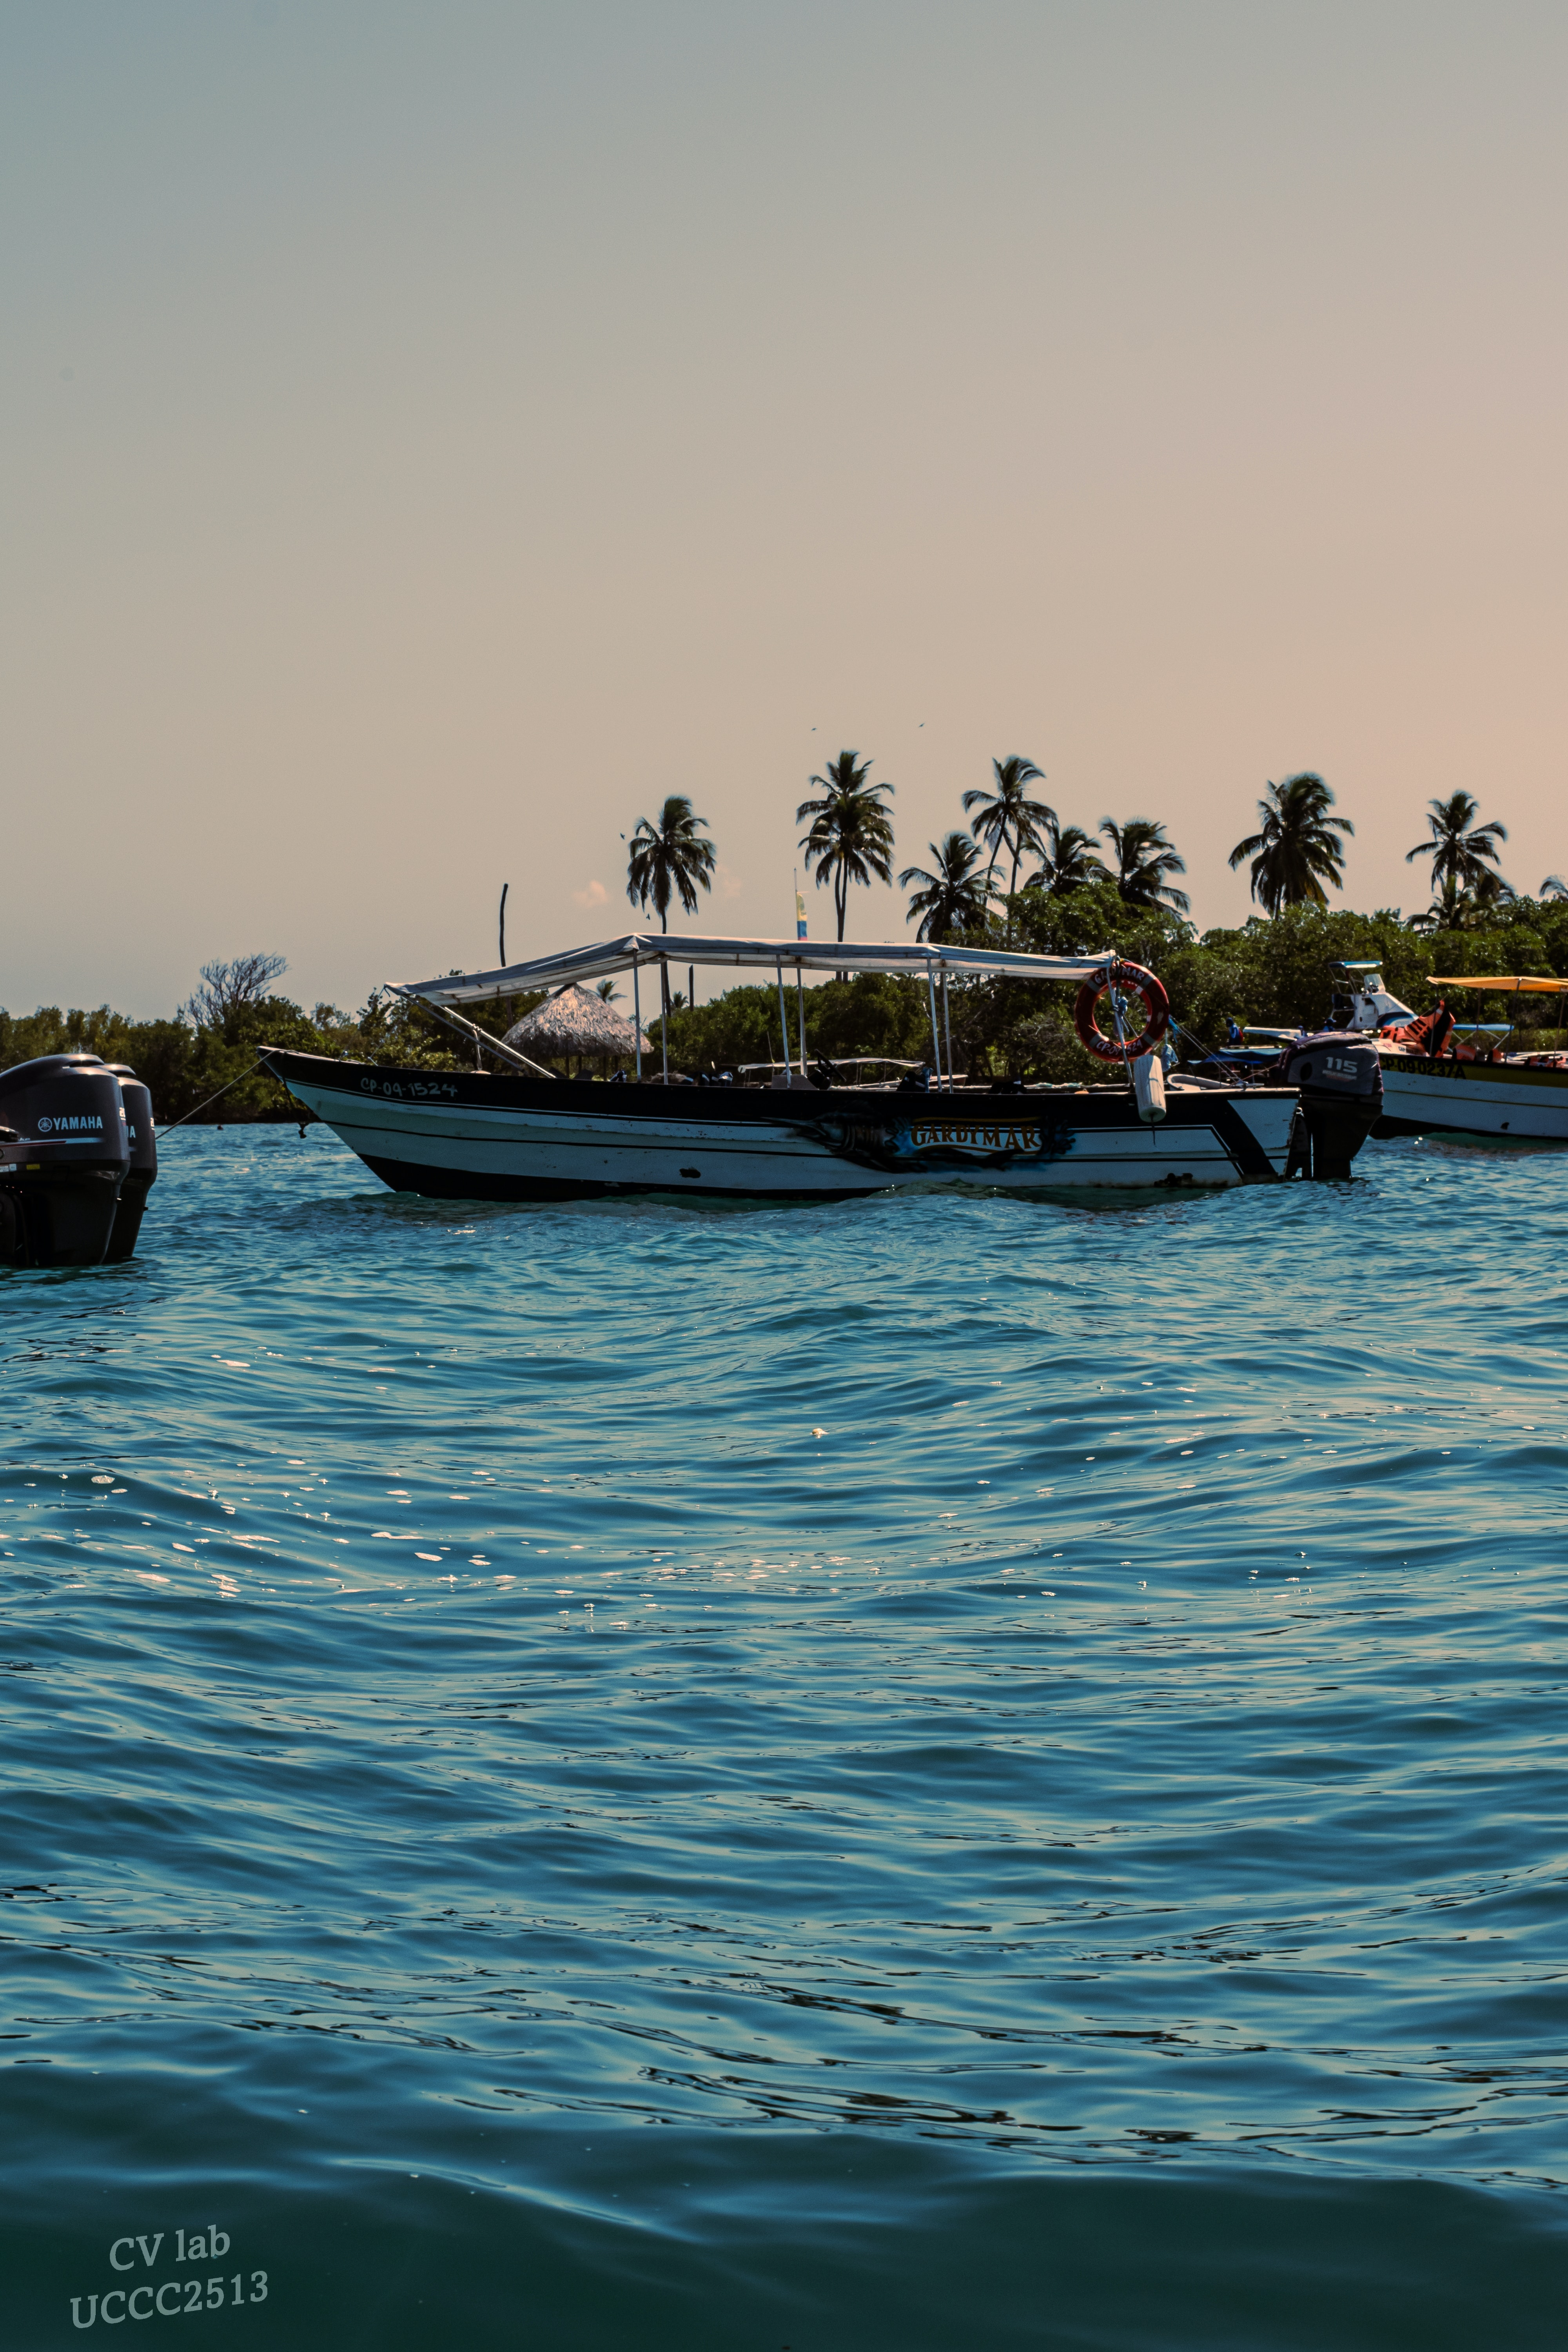

Image courtesy: Unsplash.

Notice the watermark added to the bottom left of the image. You are free to design your own watermark icon.

In [38]:
img = cv.imread("images/travel_hd.jpg")
watermark = cv.imread("images/watermark.jpg")

img = cv.resize(img, None, fx=0.3, fy=0.3)
h, w = img.shape[:2]

# Define the position of the watermark
watermark_position = (15, img.shape[0] - watermark.shape[0] - 15)

# Create a Region of Interest (ROI) for the watermark in img
roi = img[watermark_position[1]:watermark_position[1] + watermark.shape[0],
                    watermark_position[0]:watermark_position[0] + watermark.shape[1]]

alpha = 0.8

# Image blending
watermarked_roi = cv.addWeighted(roi, alpha, watermark, 1-alpha, 0)

# Replace the ROI in the img with the watermarked ROI
img[watermark_position[1]:watermark_position[1] + watermark.shape[0],
               watermark_position[0]:watermark_position[0] + watermark.shape[1]] = watermarked_roi

cv.imwrite("watermarked_travel_hd.jpg", img)
show_img("Watermark image", img)